In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Polygon

In [191]:
dat_folder = 'data/logs/standalone/'
files = ['cloud_1_run.log', 'edge_1_run.log', 
         'cloud_20.log','cloud_40.log','cloud_60.log','cloud_80.log','cloud_100.log','cloud_120.log','cloud_140.log',
         'edge_20.log','edge_40.log','edge_60.log','edge_80.log','edge_100.log','edge_120.log','edge_140.log']
header = ['time', 'latency', 'size']
column_names = ["Time","Latency (ms)","Size (MB)"]
data = {}
dfs_dict = {}

for file in files:
    i = 0
    time = 0
    run = []
    data[file[:-4]] = []
    with open(dat_folder + file, "r") as to_read:
        for l in to_read.readlines():
            if 'Time' in l: pass
            elif '------' in l:
                data[file[:-4]].append(run)
                i = i + 1
                run = []
                time = 0
            else:
                x = l[:-2].split("(")[-1].split(",")
                lat, by = float(x[0]), float(x[1]) / 10**6
                run.append((time,lat,by))
                time = time + 1
                
for scenario in map(lambda s: s[:-4], files):
    dfs_list = []
    for run in data[scenario]:
        dfs_list.append(pd.DataFrame(run, columns=column_names))
    dfs_dict[scenario] = dfs_list

# Single Run

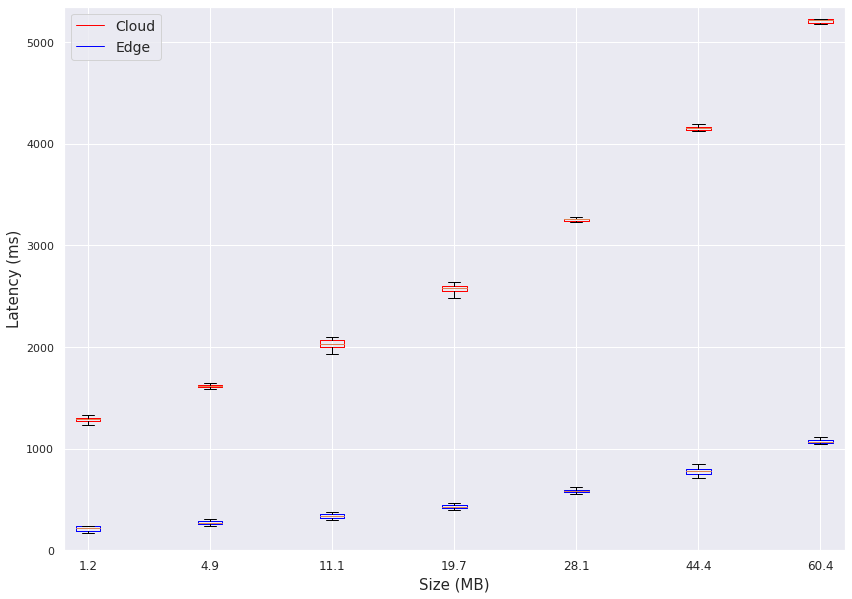

In [185]:
fig = plt.figure(figsize=[14,10])
ax = plt.subplot(111)

x = dfs_dict['edge_1_run'][0].reset_index()['Size (MB)']


boxes = []

for s in ['cloud_1_run','edge_1_run']:
    all_data = []
    for df in dfs_dict[s]:
        data = []
        i = 0
        for l in df['Latency (ms)']:
            i = i + 1
            data.append(l)
            if i % 10 == 0:
                all_data.append(data)
                data = []
    boxes.append(all_data)
b1 = ax.boxplot(boxes[0],0,'',positions=range(0,7), widths = 0.2)
b2 = ax.boxplot(boxes[1],0,'',positions=range(0,7), widths = 0.2)
for b in b1['boxes']: b.set(color='red')
for b in b2['boxes']: b.set(color='blue')
ax.set_xticks(range(0,7))
ax.set_xticklabels([round(x[0],1), round(x[10],1), round(x[20],1), round(x[30],1), round(x[40],1), round(x[50],1), round(x[60],1)], fontsize='12')
ax.set_xlabel('Size (MB)')
ax.set_ylabel('Latency (ms)')
ax.set_xlim(-0.2, 6.2)
ax.set_ylim(0, 5350)
ax.legend([b1["boxes"][0], b2["boxes"][0]], ['Cloud', 'Edge'], fontsize='14')
ax.xaxis.get_label().set_size(15)
ax.yaxis.get_label().set_size(15)
plt.show()

In [ ]:
fig.savefig(f'images/single_run_fixed_size.pdf', dpi=100)

# Independent Run

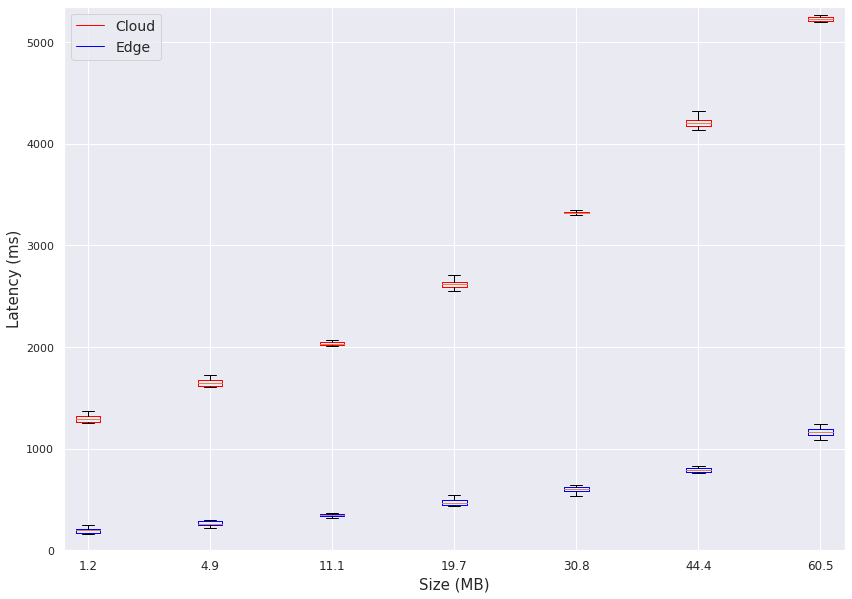

In [192]:
cloud_scenario = ['cloud_20','cloud_40','cloud_60','cloud_80','cloud_100','cloud_120','cloud_140']
edge_scenario = ['edge_20','edge_40','edge_60','edge_80','edge_100','edge_120','edge_140']

cloud_boxes = []
edge_boxes = []
x = []

fig = plt.figure(figsize=[14,10])
ax = plt.subplot(111)

for s in cloud_scenario:
    for d in dfs_dict[s][0]['Size (MB)']:
        x.append(round(d,1))
        break
    cloud_boxes.append(dfs_dict[s][0]['Latency (ms)'])
    
for s in edge_scenario: edge_boxes.append(dfs_dict[s][0]['Latency (ms)'])

b1 = ax.boxplot(cloud_boxes,0,'',positions=range(0,7), widths = 0.2)
b2 = ax.boxplot(edge_boxes,0,'',positions=range(0,7), widths = 0.2)

for b in b1['boxes']: b.set(color='red')
for b in b2['boxes']: b.set(color='blue')
    
ax.set_xticks(range(0,7))
ax.set_xticklabels(x, fontsize='12')
ax.set_xlabel('Size (MB)')
ax.set_ylabel('Latency (ms)')
ax.set_xlim(-0.2, 6.2)
ax.set_ylim(0, 5350)
ax.legend([b1["boxes"][0], b2["boxes"][0]], ['Cloud', 'Edge'], fontsize='14')
ax.xaxis.get_label().set_size(15)
ax.yaxis.get_label().set_size(15)
plt.show()


In [193]:
fig.savefig(f'images/independent_run_fixed_size.pdf', dpi=100)